In [72]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 6))
B = np.random.randint(-10, 10, 10)

def transverse(vx, vy):
    vt = np.sqrt(vx**2 + vy**2)
    return vt

def nonuniform(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    r = np.sqrt(x**2 + y**2)
    
    v = q*r*B/m
    vt = transverse(vx, vy)
    
    a = q*v*B/m
    ax = -a*(x/np.sqrt(x**2 + y**2))
    ay = -a*(y/np.sqrt(x**2 + y**2))
    az = 0
    
    return vx, vy, vz, ax, ay, az

p0 = [0, 1, 0, 1, 0, -1]



In [73]:
from scipy.integrate import odeint
solution = odeint(nonuniform, p0, t, args=(B,))

ValueError: setting an array element with a sequence.

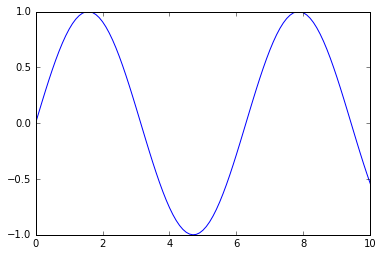

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t, solution[:,0])
plt.show()

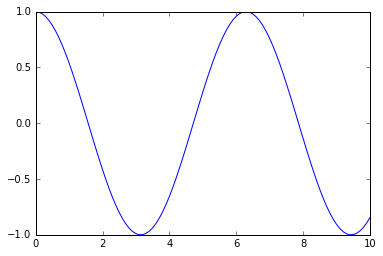

In [62]:
plt.plot(t, solution[:,1])
plt.show()

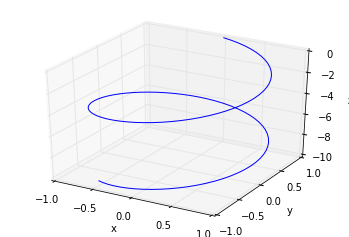

In [69]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(solution[:,0], solution[:,1], solution[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()